In [113]:
import pandas as pd
import numpy as np
from sklearn import neighbors, linear_model, model_selection, metrics
import seaborn as sns

In [114]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.impute import SimpleImputer

In [115]:
df = pd.read_csv('preprocessed_data_craigslist.csv').drop(
    ['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4292 entries, 0 to 4291
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 4292 non-null   float64
 1   numimage              4292 non-null   float64
 2   condition             2666 non-null   float64
 3   bicycleframematerial  4292 non-null   object 
 4   bicycletype           4292 non-null   object 
 5   braketype             4292 non-null   object 
 6   electricassist        4292 non-null   int64  
 7   framesize             1731 non-null   float64
 8   handlebartype         4292 non-null   object 
 9   suspension            4292 non-null   int64  
 10  wheelsize             1920 non-null   float64
 11  sizedimensions        4292 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 402.5+ KB


In [116]:
kept_var = ['braketype', 'condition', 'bicycleframematerial', 'electricassist', 'wheelsize', 'bicycletype', 'numimage', 'handlebartype']

df = df[['price'] + kept_var]
df

,price,braketype,condition,bicycleframematerial,electricassist,wheelsize,bicycletype,numimage,handlebartype
0,30.0,unknown,4.0,unknown,0,NaN,unknown,6.0,unknown
1,112.0,unknown,4.0,unknown,0,NaN,track,4.0,unknown
2,167.0,unknown,4.0,unknown,0,NaN,track,7.0,unknown
3,125.0,special,3.0,aluminum,0,26.0,mountain,9.0,special
4,75.0,mechanical,1.0,aluminum,0,NaN,mountain,0.0,unknown
...,...,...,...,...,...,...,...,...,...
4287,75.0,unknown,NaN,unknown,0,26.0,unknown,2.0,unknown
4288,100.0,mechanical,2.0,aluminum,0,24.0,mountain,2.0,unknown
4289,110.0,unknown,3.0,unknown,0,NaN,unknown,10.0,unknown
4290,50.0,unknown,4.0,unknown,0,NaN,unknown,3.0,unknown


In [117]:
df = df[(10 < df.price) & (df.price < 800)
        ].reset_index().drop(['index'], axis=1)
df

,price,braketype,condition,bicycleframematerial,electricassist,wheelsize,bicycletype,numimage,handlebartype
0,30.0,unknown,4.0,unknown,0,NaN,unknown,6.0,unknown
1,112.0,unknown,4.0,unknown,0,NaN,track,4.0,unknown
2,167.0,unknown,4.0,unknown,0,NaN,track,7.0,unknown
3,125.0,special,3.0,aluminum,0,26.0,mountain,9.0,special
4,75.0,mechanical,1.0,aluminum,0,NaN,mountain,0.0,unknown
...,...,...,...,...,...,...,...,...,...
3324,75.0,unknown,NaN,unknown,0,26.0,unknown,2.0,unknown
3325,100.0,mechanical,2.0,aluminum,0,24.0,mountain,2.0,unknown
3326,110.0,unknown,3.0,unknown,0,NaN,unknown,10.0,unknown
3327,50.0,unknown,4.0,unknown,0,NaN,unknown,3.0,unknown


In [118]:
pd.get_dummies(df).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3329 entries, 0 to 3328
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              3329 non-null   float64
 1   condition                          2024 non-null   float64
 2   electricassist                     3329 non-null   int64  
 3   wheelsize                          1479 non-null   float64
 4   numimage                           3329 non-null   float64
 5   braketype_hydraulic                3329 non-null   uint8  
 6   braketype_mechanical               3329 non-null   uint8  
 7   braketype_special                  3329 non-null   uint8  
 8   braketype_unknown                  3329 non-null   uint8  
 9   bicycleframematerial_alloy         3329 non-null   uint8  
 10  bicycleframematerial_aluminum      3329 non-null   uint8  
 11  bicycleframematerial_carbon fiber  3329 non-null   uint8

In [119]:
X = pd.get_dummies(df.drop(columns=['price']))
display(X)
y = df.price

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25,random_state=52)

,condition,electricassist,wheelsize,numimage,braketype_hydraulic,braketype_mechanical,braketype_special,braketype_unknown,bicycleframematerial_alloy,bicycleframematerial_aluminum,...,bicycletype_kids,bicycletype_mountain,bicycletype_recumbent/trike,bicycletype_road,bicycletype_tandem,bicycletype_track,bicycletype_unicycle,bicycletype_unknown,handlebartype_special,handlebartype_unknown
0,4.0,0,NaN,6.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,4.0,0,NaN,4.0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,4.0,0,NaN,7.0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,3.0,0,26.0,9.0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,1.0,0,NaN,0.0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324,NaN,0,26.0,2.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3325,2.0,0,24.0,2.0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3326,3.0,0,NaN,10.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3327,4.0,0,NaN,3.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


### Preprocessing (scaling)

In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_train)

x_train_scaled = scaler.transform(X_train)
X_train = pd.DataFrame(x_train_scaled, columns=X_train.columns)

x_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(x_test_scaled, columns=X_test.columns)

X_train, X_test

(      condition  electricassist  wheelsize  numimage  braketype_hydraulic  \
 0           NaN             0.0        NaN  0.000000                  0.0   
 1      1.000000             0.0        NaN  0.000000                  0.0   
 2      1.000000             0.0        NaN  0.000000                  0.0   
 3           NaN             0.0   0.842105  0.000000                  0.0   
 4           NaN             0.0   0.842105  0.208333                  0.0   
 ...         ...             ...        ...       ...                  ...   
 2491        NaN             0.0        NaN  0.125000                  0.0   
 2492        NaN             0.0        NaN  0.250000                  0.0   
 2493        NaN             0.0        NaN  0.416667                  0.0   
 2494        NaN             0.0        NaN  0.166667                  0.0   
 2495   0.666667             0.0   0.842105  0.125000                  0.0   
 
       braketype_mechanical  braketype_special  braketype_unkn

### Preprocessing (inputing)

In [121]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = pd.DataFrame(data=imp_mean.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(data=imp_mean.fit_transform(X_test), columns=X_test.columns)

X_train

,condition,electricassist,wheelsize,numimage,braketype_hydraulic,braketype_mechanical,braketype_special,braketype_unknown,bicycleframematerial_alloy,bicycleframematerial_aluminum,...,bicycletype_kids,bicycletype_mountain,bicycletype_recumbent/trike,bicycletype_road,bicycletype_tandem,bicycletype_track,bicycletype_unicycle,bicycletype_unknown,handlebartype_special,handlebartype_unknown
0,0.852409,0.0,0.702409,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.000000,0.0,0.702409,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.000000,0.0,0.702409,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.852409,0.0,0.842105,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.852409,0.0,0.842105,0.208333,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,0.852409,0.0,0.702409,0.125000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2492,0.852409,0.0,0.702409,0.250000,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2493,0.852409,0.0,0.702409,0.416667,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2494,0.852409,0.0,0.702409,0.166667,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# Linear Regression

In [122]:
linear_regression = linear_model.LinearRegression()

linear_regression.fit(X_train, y_train)

LinearRegression()

In [123]:
linear_regression.intercept_

162.41726936070341

In [124]:
linear_regression.coef_

array([  97.31903421,  207.43966496,  152.41110883,   63.96405381,
        174.13259278,    9.45467407,  -96.12266915,  -87.4645977 ,
        -42.6843696 ,    9.02327845,  194.96707174,  -21.35420148,
        -43.4815775 ,  -41.8129201 ,  -54.65728151,   -2.80898963,
        -58.34345353,  -37.0115176 ,  162.47916837,   34.89045581,
        -11.93778981,  -10.35882063,  -87.06185858,  -75.92383846,
        103.1613472 ,    7.08183913, -115.13198812,  -35.32896043,
        176.52830252,  -50.23389626,   25.34547942,  -25.34547942])

In [125]:
y_pred = linear_regression.predict(X_test)
print('Coefficients: \n', linear_regression.coef_, len(linear_regression.coef_))
# The mean squared error
print("RMSE: %.2f" %
      sqrt(np.mean((linear_regression.predict(X_test) - y_test) ** 2)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % linear_regression.score(X_test, y_test))

Coefficients: 
 [  97.31903421  207.43966496  152.41110883   63.96405381  174.13259278
    9.45467407  -96.12266915  -87.4645977   -42.6843696     9.02327845
  194.96707174  -21.35420148  -43.4815775   -41.8129201   -54.65728151
   -2.80898963  -58.34345353  -37.0115176   162.47916837   34.89045581
  -11.93778981  -10.35882063  -87.06185858  -75.92383846  103.1613472
    7.08183913 -115.13198812  -35.32896043  176.52830252  -50.23389626
   25.34547942  -25.34547942] 32
RMSE: 159.87
Variance score: 0.24


In [126]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred = df_pred[(df_pred['Predicted'] > 20) & (df_pred['Predicted'] < 2000)]
df_pred

,Actual,Predicted
427,60.0,134.959315
1317,20.0,56.042980
2825,150.0,152.401974
869,700.0,124.029682
840,125.0,233.475025
...,...,...
15,30.0,29.324453
3029,175.0,139.536293
1188,100.0,150.633412
3314,150.0,70.287031


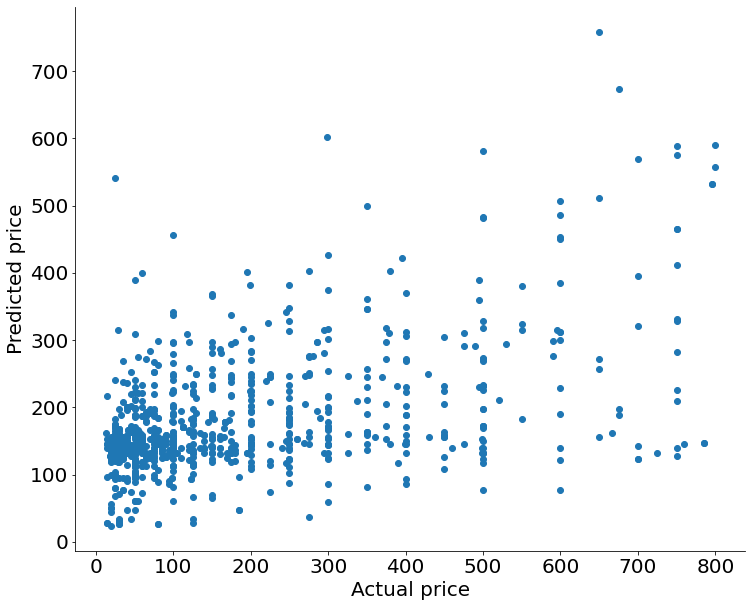

In [127]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 10))
plt.scatter(df_pred['Actual'], df_pred['Predicted'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Actual price', fontsize=20)
plt.ylabel('Predicted price', fontsize=20)

sns.despine()

<AxesSubplot:>

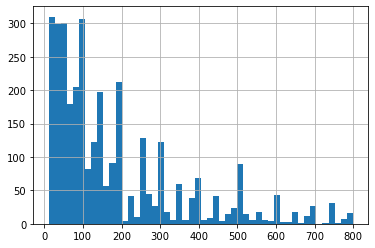

In [128]:
df['price'].hist(bins=50)

In [129]:
#import statsmodels.api as sm
# X_train = sm.add_constant(X_train) # adding a constant
# X_test = sm.add_constant(X_test) # adding a constant
#
#
#model = sm.OLS(y_train, X_train).fit()
#predictions = model.predict(X_test)
#
#print_model = model.summary()
# print(print_model)

# KNN

In [130]:
rmse_val = []  # to store rmse values for different k
for K in range(40):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    model.fit(X_train, y_train)  # fit the model
    pred = model.predict(X_test)  # make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred))  # calculate rmse
    rmse_val.append(error)  # store rmse values
fit_df = pd.DataFrame({'k': range(1, 41), 'RMSE': rmse_val}).set_index('k')
display(fit_df)
best_k = int(fit_df.idxmin())
best_k

,RMSE
k,
1,195.475773
2,178.238873
3,167.977312
4,161.325790
5,158.571038
6,160.064040
7,162.495037
8,161.233674
9,161.232680


5

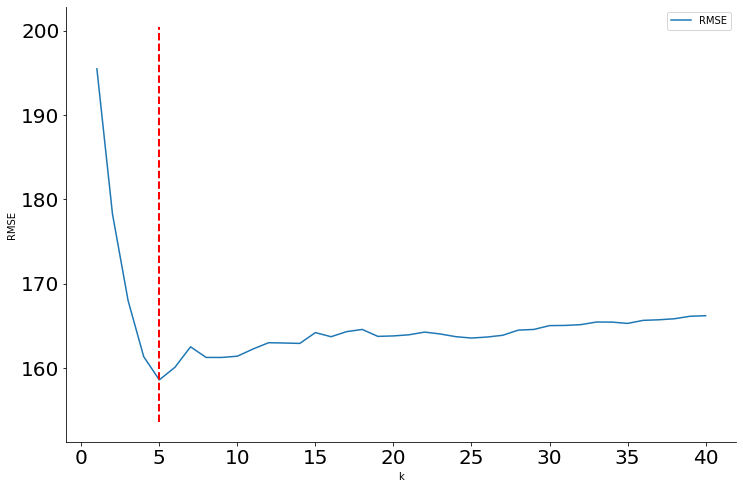

In [131]:
fit_df.plot(ylabel='RMSE', figsize=[12, 8], fontsize=20)
plt.plot([best_k, best_k], [fit_df['RMSE'].min()-5, fit_df['RMSE'].max()+5], color='red',
         linestyle='dashed', linewidth=2)

sns.despine()

In [132]:
model = neighbors.KNeighborsRegressor(n_neighbors=best_k)
model.fit(X_train, y_train)  # fit the model
pred_KNN = model.predict(X_test)

In [133]:
df_pred_KNN = pd.DataFrame({'Actual': y_test, 'Predicted': pred_KNN})
df_pred_KNN = df_pred_KNN[(df_pred_KNN['Predicted'] > 20) & (
    df_pred_KNN['Predicted'] < 2000)]
df_pred_KNN

,Actual,Predicted
427,60.0,60.0
1317,20.0,73.0
2825,150.0,165.0
869,700.0,153.0
840,125.0,348.0
...,...,...
15,30.0,47.0
3029,175.0,124.0
1188,100.0,106.0
3314,150.0,77.4


In [134]:
# Linear Regression vs KNN
print('RMSE for linear regression : ', sqrt(
    mean_squared_error(y_test, y_pred)))
print('RMSE for KNN with best K : ', sqrt(
    mean_squared_error(y_test, pred_KNN)))

RMSE for linear regression :  159.8657977616559
RMSE for KNN with best K :  158.57103777679154


# Random Forest Regression

In [135]:
from sklearn.model_selection import GridSearchCV

grid = {
    'n_estimators': [400, 500, 600, 700],
    'max_features': ['sqrt','log2'],
    'max_depth' : [5, 6, 7, 8],
    'random_state' : [52]
 }

#Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV_rfr.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [400, 500, 600, 700],
                         'random_state': [52]})

In [136]:
CV_rfr.best_params_

# Output is :

'''
{'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 500,
 'random_state': 52}
 '''

"\n{'max_depth': 7,\n 'max_features': 'sqrt',\n 'n_estimators': 500,\n 'random_state': 52}\n "

In [137]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, max_features='sqrt',
                           max_depth=7, random_state=52).fit(X_train, y_train)
pred_RF = rf.predict(X_test)
mse = mean_squared_error(y_test, pred_RF)
rmse = mse**.5
print(rmse)

157.05862220197565


In [138]:
df_pred_RF = pd.DataFrame({'Actual': y_test, 'Predicted': pred_RF})
df_pred_RF = df_pred_RF[(df_pred_RF['Predicted'] > 20)
                        & (df_pred_RF['Predicted'] < 2000)]
df_pred_RF

,Actual,Predicted
427,60.0,154.215448
1317,20.0,135.406513
2825,150.0,171.567211
869,700.0,153.487945
840,125.0,208.871069
...,...,...
15,30.0,94.105639
3029,175.0,140.660015
1188,100.0,144.506737
3314,150.0,117.160295


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

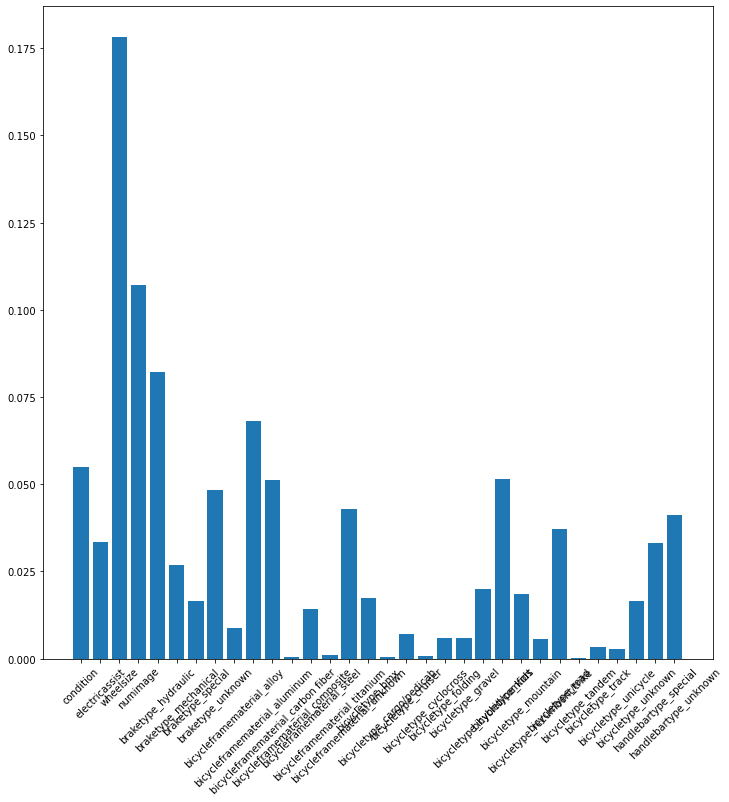

In [139]:
plt.figure(figsize=(12,12))
plt.bar(X_train.columns, rf.feature_importances_)
plt.xticks(rotation=45)

# Sum-up

In [140]:
# Linear Regression vs KNN vs RF
print('RMSE for linear regression : ', sqrt(
    mean_squared_error(y_test, y_pred)))
print('RMSE for KNN with best K : ', sqrt(
    mean_squared_error(y_test, pred_KNN)))
print('RMSE for RF with best params : ', sqrt(
    mean_squared_error(y_test, pred_RF)))


RMSE for linear regression :  159.8657977616559
RMSE for KNN with best K :  158.57103777679154
RMSE for RF with best params :  157.05862220197565


In [141]:
df_pred_sum_up = pd.DataFrame({'Actual': y_test,'Predicted with Linear Regression':y_pred,'Predicted with KNN k ='+str(best_k):pred_KNN,'Predicted with Random Forest': pred_RF})
average_pred = df_pred_sum_up.drop("Actual",axis=1).mean(axis=1)
df_pred_sum_up['Average']=average_pred

df_pred_sum_up = df_pred_sum_up[(df_pred_sum_up['Predicted with Linear Regression'] > 20)
                        & (df_pred_sum_up['Predicted with Linear Regression'] < 2000)]
df_pred_sum_up = df_pred_sum_up[(df_pred_sum_up['Predicted with KNN k ='+str(best_k)] > 20)
                        & (df_pred_sum_up['Predicted with KNN k ='+str(best_k)] < 2000)]
df_pred_sum_up = df_pred_sum_up[(df_pred_sum_up['Predicted with Random Forest'] > 20)
                        & (df_pred_sum_up['Predicted with Random Forest'] < 2000)]

df_pred_sum_up.reset_index().drop('index',axis=1)

,Actual,Predicted with Linear Regression,Predicted with KNN k =5,Predicted with Random Forest,Average
0,60.0,134.959315,60.0,154.215448,116.391588
1,20.0,56.042980,73.0,135.406513,88.149831
2,150.0,152.401974,165.0,171.567211,162.989728
3,700.0,124.029682,153.0,153.487945,143.505876
4,125.0,233.475025,348.0,208.871069,263.448698
...,...,...,...,...,...
818,30.0,29.324453,47.0,94.105639,56.810031
819,175.0,139.536293,124.0,140.660015,134.732103
820,100.0,150.633412,106.0,144.506737,133.713383
821,150.0,70.287031,77.4,117.160295,88.282442


In [142]:
print('RMSE for Average : ', sqrt(
    mean_squared_error(y_test, average_pred)))

RMSE for Average :  153.47858493688824


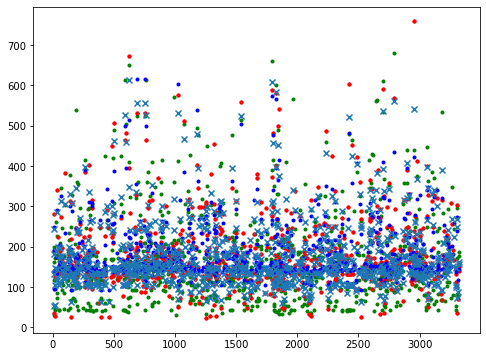

In [143]:
x = df_pred_sum_up.index

fig = plt.figure(figsize=(8,6))  #setting the figure size
plt.scatter(x, df_pred_sum_up['Predicted with Linear Regression'],marker='.',color='r') 

plt.scatter(x, df_pred_sum_up['Predicted with KNN k ='+str(best_k)],marker='.',color='g') 
plt.scatter(x, df_pred_sum_up['Predicted with Linear Regression'],marker='.',color='r') 
plt.scatter(x, df_pred_sum_up['Predicted with Random Forest'],marker='.',color='b') 
plt.scatter(x,df_pred_sum_up['Average'],marker='x')

plt.show()

In [148]:
from sklearn.ensemble import GradientBoostingRegressor

parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

#Grid Search function
CV_gb = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=parameters, cv= 5)
CV_gb.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [150]:
CV_gb.best_params_

{'learning_rate': 0.03, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.5}

In [191]:

reg = GradientBoostingRegressor(learning_rate=0.1, max_depth=10, n_estimators=80, subsample=0.5, random_state=52)
reg.fit(X_train, y_train)

np.sqrt(np.mean((reg.predict(X_test)- y_test)**2))

155.76291825468388

In [192]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

np.sqrt(np.mean((ada.predict(X_test)- y_test)**2))

172.78093442593877

In [195]:
import xgboost as xgb

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

CV_xgb = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=params, cv= 5, verbose=True)
CV_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


C:\Users\adrie\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\adrie\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\adrie\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\adrie\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pan

In [ ]:
CV_xgb.best_params_

In [194]:

model=xgb.XGBRegressor()
model.fit(X_train, y_train)
np.sqrt(np.mean((model.predict(X_test)- y_test)**2))

C:\Users\adrie\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


156.37103845843072